In [ ]:
pip install yfinance

In [ ]:
pip install pandas

In [ ]:
pip install statsmodels

In [ ]:
pip install  matplotlib

In [ ]:
pip install cufflinks

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Download data from Yahoo Finance
data = yf.download('CLOV', start='2020-01-01', end='2024-12-31')
data = data['Close']  # Use the 'Close' price
data = data.asfreq('D')  # Set frequency to daily
data = data.fillna(method='ffill')  # Forward fill to handle missing values

[*********************100%***********************]  1 of 1 completed
<ipython-input-9-e4834737b452>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill to handle missing values


In [ ]:
import numpy as np

WINDOW = 12
selected_columns = ['price_log', 'rolling_mean_log',
                   'rolling_std_log']

df['price_log'] = np.log(df.price_deflated)
df['rolling_mean_log'] = df.price_log.rolling(WINDOW) \
    .mean()
df['rolling_std_log'] = df.price_log.rolling(WINDOW) \
    .std()

df[selected_columns].plot(title='Gold Price (logged)')

plt.tight_layout()
plt.show()

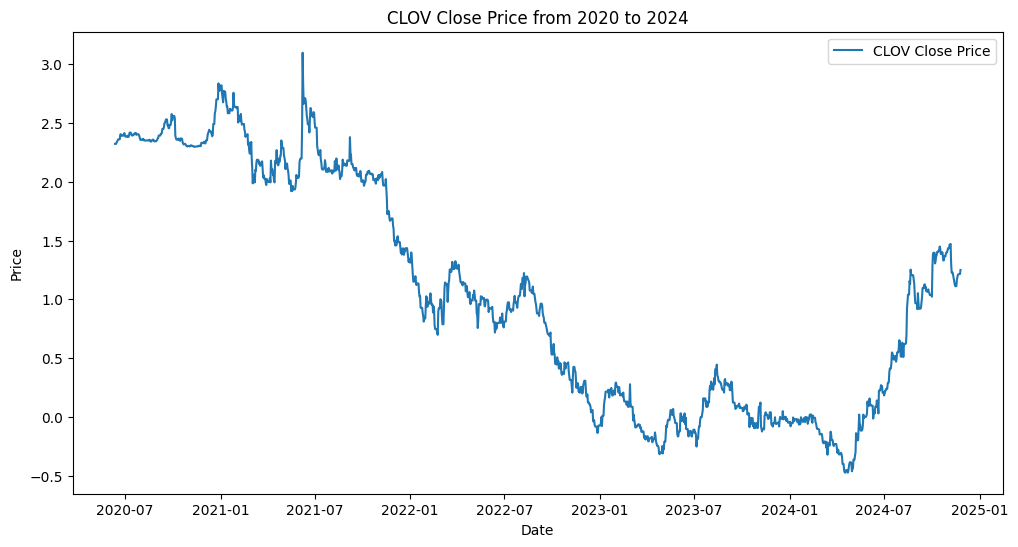

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='CLOV Close Price')
plt.title('CLOV Close Price from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.347331812688066
p-value: 0.6072495982262904


In [ ]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Download data from Yahoo Finance
data = yf.download('CLOV', start='2020-01-01', end='2024-12-31')
data = data['Close']  # Use the 'Close' price
data = data.asfreq('D')  # Set frequency to daily
data = data.fillna(method='ffill')  # Forward fill to handle missing values

# Perform Augmented Dickey-Fuller test
result = adfuller(data)

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

[*********************100%***********************]  1 of 1 completed

ADF Statistic: -1.876086334242847
p-value: 0.3433931100178975
Critical Values:
   1%: -3.4344156425955177
   5%: -2.86333574401553
   10%: -2.5677260171554885



<ipython-input-44-1978f389a60c>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill to handle missing values


In [ ]:
data_diff = data.diff().dropna()
result_diff = adfuller(data_diff)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -9.822878284764892
p-value after differencing: 5.280717848316173e-17


#Proceed with ARIMA

In [ ]:
!pip install statsmodels

In [ ]:
# Download data from Yahoo Finance
data = yf.download('CLOV', start='2020-01-01', end='2024-12-31')
data = data['Close']  # Use the 'Close' price
data = data.asfreq('D')  # Set frequency to daily
data = data.fillna(method='ffill')  # Forward fill to handle missing values

[*********************100%***********************]  1 of 1 completed
<ipython-input-47-e4834737b452>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill to handle missing values


In [ ]:
data_diff = data.diff().dropna()
result_diff = adfuller(data_diff)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -9.822878284764892
p-value after differencing: 5.280717848316173e-17


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

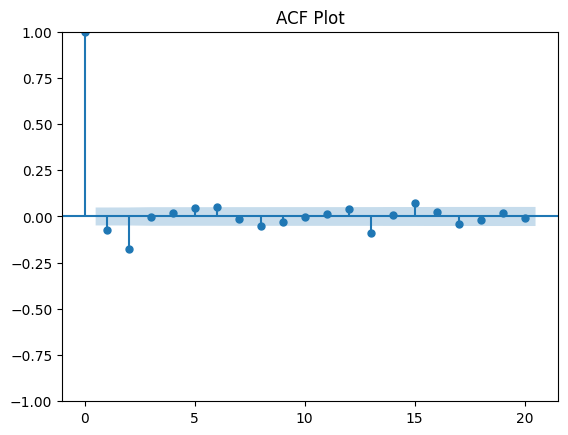

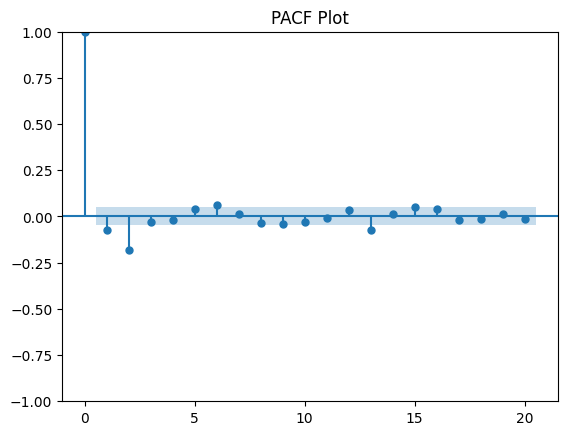

In [ ]:
# Plot ACF
plot_acf(data_diff, lags=20)
plt.title('ACF Plot')
plt.show()

# Plot PACF
plot_pacf(data_diff, lags=20)
plt.title('PACF Plot')
plt.show()

In [ ]:
p = 1  # Replace with your determined p value
d = 1  # Replace with your determined d value
q = 1  # Replace with your determined q value

model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   CLOV   No. Observations:                 1628
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -735.142
Date:                Tue, 26 Nov 2024   AIC                           1476.284
Time:                        09:23:14   BIC                           1492.468
Sample:                    06-12-2020   HQIC                          1482.289
                         - 11-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4733      0.034     14.055      0.000       0.407       0.539
ma.L1         -0.6091      0.032    -19.129      0.000      -0.672      -0.547
sigma2         0.1445      0.000    345.178      0.0

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.876086334242847
p-value: 0.3433931100178975


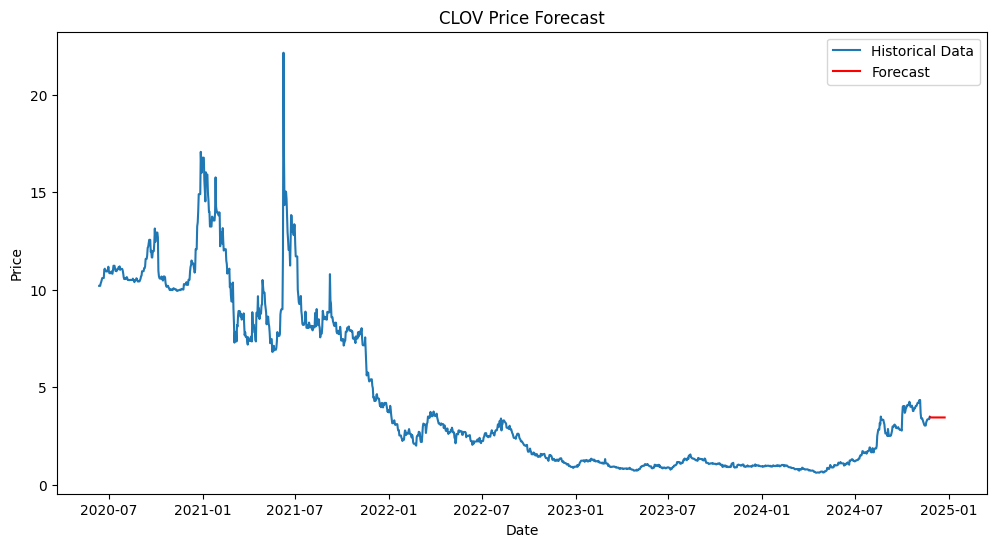

In [ ]:
forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('CLOV Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

# Create a time index for the forecasted dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Combine dates and forecast values into a DataFrame
forecast_table = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Price': forecast
})

# Set 'Date' as the index for a time-series table
forecast_table.set_index('Date', inplace=True)

# Display the forecast table
print(forecast_table)

# Optionally, save to a CSV file
forecast_table.to_csv('forecast_table.csv')

                           Forecasted Price
Date                                       
2024-11-26 00:00:00+00:00          3.471366
2024-11-27 00:00:00+00:00          3.462547
2024-11-28 00:00:00+00:00          3.458374
2024-11-29 00:00:00+00:00          3.456398
2024-11-30 00:00:00+00:00          3.455464
2024-12-01 00:00:00+00:00          3.455021
2024-12-02 00:00:00+00:00          3.454812
2024-12-03 00:00:00+00:00          3.454713
2024-12-04 00:00:00+00:00          3.454666
2024-12-05 00:00:00+00:00          3.454644
2024-12-06 00:00:00+00:00          3.454633
2024-12-07 00:00:00+00:00          3.454628
2024-12-08 00:00:00+00:00          3.454626
2024-12-09 00:00:00+00:00          3.454625
2024-12-10 00:00:00+00:00          3.454624
2024-12-11 00:00:00+00:00          3.454624
2024-12-12 00:00:00+00:00          3.454624
2024-12-13 00:00:00+00:00          3.454624
2024-12-14 00:00:00+00:00          3.454624
2024-12-15 00:00:00+00:00          3.454624
2024-12-16 00:00:00+00:00       

#This section is taken at 26 Nov 2024, however here's CLOV price status

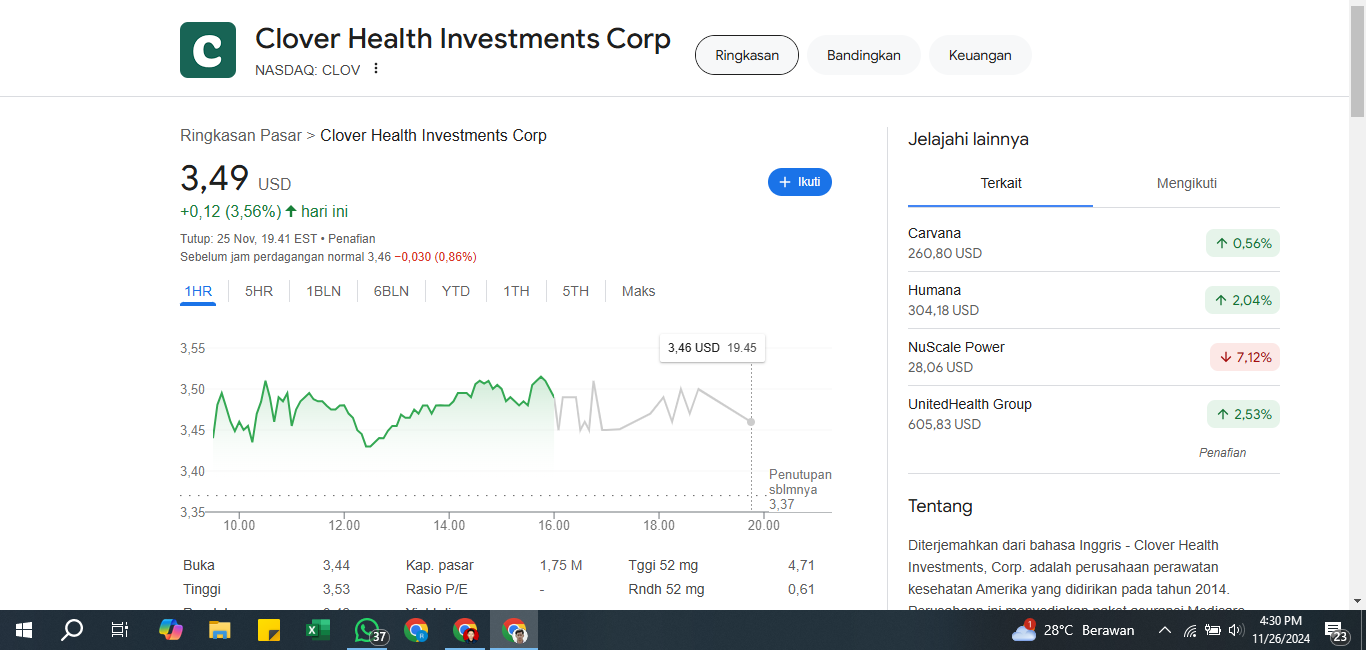